In [37]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## ガウス分布

### 乱数の生成

In [39]:
import numpy as np
rng = np.random.default_rng()
rng.standard_normal()
rng.standard_normal()

2.285186719589269

### ガウス分布に従う乱数のサンプリング

In [40]:
def myrandn (N=1):
    rng = np.random.default_rng()
    r1 = rng.random(N)
    r2 = rng.random(N)
    v = np.sqrt(-2 * np.log(r1)) * np.sin(2*np.pi*r2)
    return v

In [41]:
myrandn(1)

array([-1.46392133])

In [42]:
myrandn(10)

array([ 0.87706712,  0.96438555, -1.28427789,  1.25588482,  1.62516542,
        2.18493528, -0.44757393,  1.22046095,  1.2499478 ,  0.52754101])

Text(0, 0.5, 'freq')

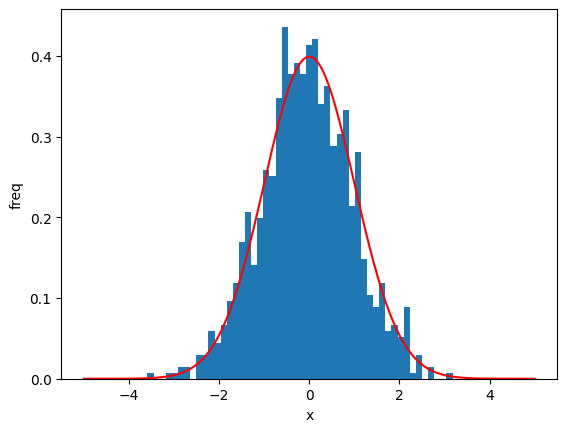

In [43]:
x_sample = myrandn(1000)
x = np.linspace(-5,5,200)
y = (1/np.sqrt(2*np.pi)) * np.exp(-(1/2)*x*x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(x_sample, bins=50, density=True)
ax.plot(x,y,'r-')
ax.set_xlabel('x')
ax.set_ylabel('freq')

<!-- 線形回帰モデルにおける誤差 -->

## 多変量ガウス分布

### パラメータの定義

In [44]:
cov1 = np.array([[1.0, 0.9], [0.9, 1]])
cov2 = np.array([[1.0, -0.7], [-0.7, 1]])

### 多変量ガウス分布の確率密度関数

In [45]:
def gauss_multiple(x, cov=np.array([[1,0],[0,1]]), mu=np.array([[0],[0]])) -> np.array:
    D = x.shape[0]
    N = x.shape[1]
    x = x - mu # 中心化
    coef = 1/(np.sqrt(2*np.pi)**D * np.sqrt(np.linalg.det(cov)))
    y = np.array([np.exp(-(x[:,i].T @ (np.linalg.inv(cov) @ x[:,i]))/2) for i in range(N)]) * coef
    return y

def gauss_multiple_3dpdf(x1, x2, cov=np.array([[1,0],[0,1]]), mu=np.array([[0],[0]])):
    xx, yy = np.meshgrid(x1, x2)
    zz = np.array([[gauss_multiple(np.array([[xx[i][j]], [yy[i][j]]]), cov=cov, mu=mu)[0] for j in range(len(xx[i]))] for i in range(len(xx))])
    return xx, yy, zz

In [46]:
def plot_3d(xx, yy, zz):
    surface = go.Surface(
        x=xx,
        y=yy,
        z=zz,
        # opacity=0.5,
        colorscale=[[0, 'blue'], [1, 'red']],
        # showscale=False
    )
    layout = go.Layout(
        scene=dict(
            xaxis_title='x1',
            yaxis_title='x2',
            zaxis_title='y'
        ),
    )
    fig = go.Figure(data=[surface], layout=layout)
    fig.show()

In [47]:
x1 = np.linspace(-3, 3, 101)
x2 = np.linspace(-3, 3, 101)

In [48]:
xx, yy, zz = gauss_multiple_3dpdf(x1, x2)
plot_3d(xx, yy, zz)

In [49]:
xx, yy, zz = gauss_multiple_3dpdf(x1, x2, cov=cov1)
plot_3d(xx, yy, zz)

In [50]:
xx, yy, zz = gauss_multiple_3dpdf(x1, x2, cov=cov2)
plot_3d(xx, yy, zz)

### 2変量ガウス分布からのサンプリング

In [51]:
N = 200
x_sample = np.random.normal(size=(2,N))

L1 = np.linalg.cholesky(cov1)
L2 = np.linalg.cholesky(cov2)

x_sample1 = L1 @ x_sample
x_sample2 = L2 @ x_sample

[]

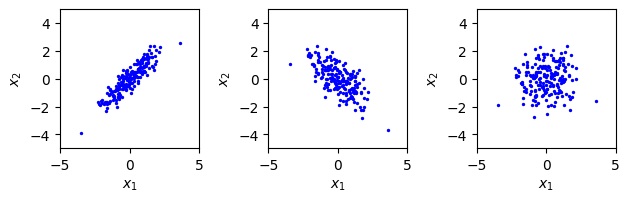

In [52]:
x_samples = [x_sample1, x_sample2, x_sample]

fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(x_samples[i][0,:], x_samples[i][1,:], color='blue', s=2)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_aspect('equal')
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])

fig.tight_layout()
plt.plot()

### 累積密度分布の描画

In [94]:
def plot_2d_all(xx, yy, zz):
    xx_marginal = zz.sum(axis=0)*((xx[0,-1]-xx[0,0])/len(xx[0,:]))
    yy_marginal = zz.sum(axis=1)*((yy[-1,0]-yy[0,0])/len(yy[:,0]))

    # 2x2のサブプロットを作成
    fig, axes = plt.subplots(2, 2, figsize=(9, 8), 
                            gridspec_kw={'width_ratios': [4, 1], 'height_ratios': [1, 4]},
                            constrained_layout=True)

    # 上（x軸方向のマージナル分布）
    axes[0, 0].plot(xx[0,:], xx_marginal, color='black')
    axes[0, 0].set_xlim(xx.min(), xx.max())
    axes[0, 0].set_ylim(0, 0.4)
    axes[0, 0].tick_params(labelbottom=False)

    # 右（y軸方向のマージナル分布）
    axes[1, 1].plot(yy_marginal, yy[:,0], color='black')
    axes[1, 1].set_ylim(yy.min(), yy.max())
    axes[1, 1].set_xlim(0, 0.4)
    axes[1, 1].invert_xaxis()
    axes[1, 1].tick_params(labelleft=False)

    # 中央（2Dヒートマップ）
    im = axes[1, 0].imshow(zz, origin='lower', extent=[xx.min(), xx.max(), yy.min(), yy.max()], 
                           aspect='equal',
                           cmap='viridis')
    axes[1, 0].set_xlabel("x1")
    axes[1, 0].set_ylabel("x2")

    # 右上は使わない
    axes[0, 1].axis('off')

    # カラーバーを追加（中央のヒートマップに対応）
    fig.colorbar(im, ax=axes[1, 0], shrink=0.8)
    
    plt.show()

In [95]:
x1 = np.linspace(-3, 3, 101)
x2 = np.linspace(-3, 3, 101)
xx, yy, zz = gauss_multiple_3dpdf(x1, x2, cov=cov1)

# zz_x1 = zz.sum(axis=0)
# zz_x2 = zz.sum(axis=1)

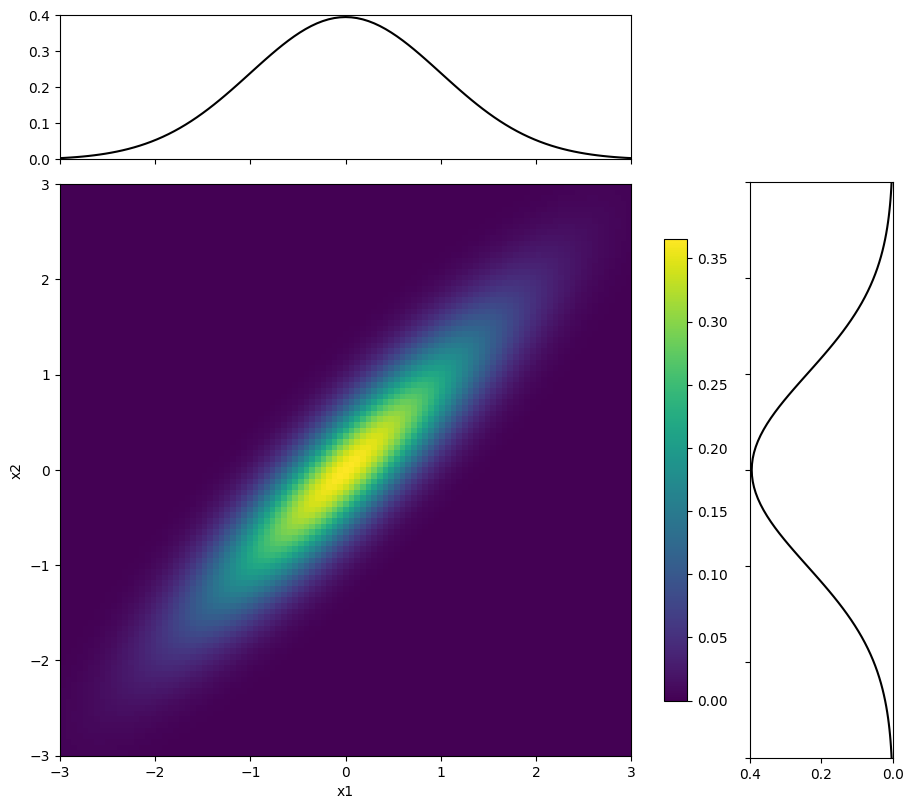

In [96]:
plot_2d_all(xx, yy, zz)

### 条件付き確率密度分布の描画

In [53]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# 2変量ガウス分布の3Dプロット、及びあるx1の値に対するyの値を表示する

x1 = np.linspace(-5, 5, 201)
x2 = np.linspace(-5, 5, 201)
xx, yy, zz = gauss_multiple_3dpdf(x1, x2, cov=cov1)

plot_3d(xx, yy, zz)

# スライダーで x=const の断面を表示
def plot_cross_section(x_index):
    x_val = xx[0, x_index]
    z_cross = zz[:, x_index]

    fig, ax = plt.subplots()
    ax.plot(yy[:, x_index], z_cross, label=f"x = {x_val:.2f}") # 値のスケールは行っていない
    ax.set_title(f"x1 = {x_val:.2f}")
    ax.set_xlabel("x2")
    ax.set_ylabel("y")
    ax.set_xlim([-5, 5])
    ax.set_ylim([0, 0.4])
    ax.legend()
    plt.show()

slider = widgets.IntSlider(min=0, max=len(xx)-1, step=1, description="x index")
widgets.interact(plot_cross_section, x_index=slider)

interactive(children=(IntSlider(value=0, description='x index', max=200), Output()), _dom_classes=('widget-int…

<function __main__.plot_cross_section(x_index)>